# Optical RL-Gym

This code was presented as part of the hackathon at the ECOC'2022.
To run this, you need to install the packages listed in the `stable_baselines3` folder.

In [2]:
# imports
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import clear_output

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# config
heuristic_folder = '../heuristics/bkp/rmsa-heu/'
deeprmsa_ppo_folder = '../stable_baselines3/bkp/deeprmsa-ppo-trained/'
plotting_average_window = 100

# loading heuristics
rnd_data = pd.read_csv(heuristic_folder + 'rnd.monitor.csv', skiprows=1)
sp_ff_data = pd.read_csv(heuristic_folder + 'sp_ff.monitor.csv', skiprows=1)
sap_ff_data = pd.read_csv(heuristic_folder + 'sap_ff.monitor.csv', skiprows=1)
llp_ff_data = pd.read_csv(heuristic_folder + 'llp_ff.monitor.csv', skiprows=1)
deeprmsa_ppo_trained = pd.read_csv(deeprmsa_ppo_folder + 'training.monitor.csv', skiprows=1)
rnd_data.describe()


,r,l,t,episode_service_blocking_rate,episode_bit_rate_blocking_rate
count,50000.00000,50000.0,50000.000000,50000.000000,50000.000000
mean,13.53654,50.0,834.719009,0.729269,0.746907
std,3.05357,0.0,481.447159,0.061071,0.061742
min,2.00000,50.0,0.045995,0.460000,0.458489
25%,11.00000,50.0,418.016881,0.680000,0.706091
50%,13.00000,50.0,834.124077,0.740000,0.748652
75%,16.00000,50.0,1251.364716,0.780000,0.789642
max,27.00000,50.0,1668.599873,0.960000,0.962043


## Visualizing live training

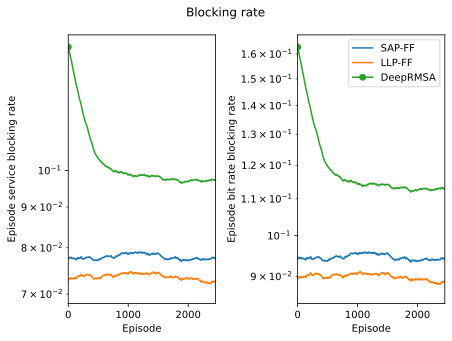

In [7]:
while True:

    plotting_average_window = 2500
    time.sleep(2)

    # load current training output
    deeprmsa_ppo_training = pd.read_csv('../stable_baselines3/tmp/deeprmsa-ppo/training.monitor.csv', skiprows=1)

    clear_output(wait=True)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Blocking rate')

    # ax1.semilogy(np.convolve(rnd_data['episode_service_blocking_rate'], np.ones(plotting_average_window)/plotting_average_window, mode='valid'), label='Rnd')
    # ax1.semilogy(np.convolve(sp_ff_data['episode_service_blocking_rate'], np.ones(plotting_average_window)/plotting_average_window, mode='valid'), label='SP-FF')
    ax1.semilogy(np.convolve(sap_ff_data['episode_service_blocking_rate'], np.ones(plotting_average_window)/plotting_average_window, mode='valid'), label='SAP-FF')
    ax1.semilogy(np.convolve(llp_ff_data['episode_service_blocking_rate'], np.ones(plotting_average_window)/plotting_average_window, mode='valid'), label='LLP-FF')

    deeprmsa_ep_br = np.convolve(deeprmsa_ppo_training['episode_service_blocking_rate'], np.ones(plotting_average_window)/plotting_average_window, mode='valid')
    ax1.semilogy(deeprmsa_ep_br, label="DeepRMSA", marker="o", markevery=plotting_average_window)

    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Episode service blocking rate')
    ax1.set_xlim([0, len(deeprmsa_ep_br)])

    # ax2.semilogy(np.convolve(rnd_data['episode_bit_rate_blocking_rate'], np.ones(plotting_average_window)/plotting_average_window, mode='valid'), label='Rnd')
    # ax2.semilogy(np.convolve(sp_ff_data['episode_bit_rate_blocking_rate'], np.ones(plotting_average_window)/plotting_average_window, mode='valid'), label='SP-FF')
    ax2.semilogy(np.convolve(sap_ff_data['episode_bit_rate_blocking_rate'], np.ones(plotting_average_window)/plotting_average_window, mode='valid'), label='SAP-FF')
    ax2.semilogy(np.convolve(llp_ff_data['episode_bit_rate_blocking_rate'], np.ones(plotting_average_window)/plotting_average_window, mode='valid'), label='LLP-FF')

    deeprmsa_ep_bbr = np.convolve(deeprmsa_ppo_training['episode_bit_rate_blocking_rate'], np.ones(plotting_average_window)/plotting_average_window, mode='valid')
    ax2.semilogy(deeprmsa_ep_bbr, label="DeepRMSA", marker="o", markevery=plotting_average_window)

    ax2.set_xlabel('Episode')
    ax2.set_ylabel('Episode bit rate blocking rate')
    ax2.set_xlim([0, len(deeprmsa_ep_bbr)])

    plt.legend(loc=1)
    plt.tight_layout()
    plt.show()
    break

## Visualizing a trained model

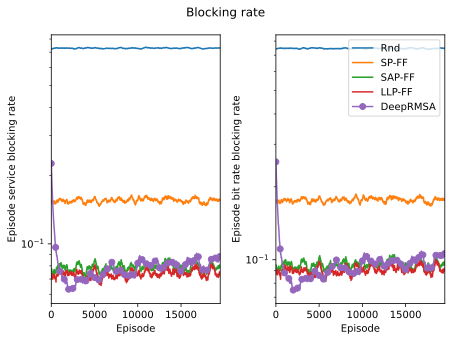

In [4]:
plotting_average_window = 500

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Blocking rate')

ax1.semilogy(np.convolve(rnd_data['episode_service_blocking_rate'], np.ones(plotting_average_window)/plotting_average_window, mode='valid'), label='Rnd')
ax1.semilogy(np.convolve(sp_ff_data['episode_service_blocking_rate'], np.ones(plotting_average_window)/plotting_average_window, mode='valid'), label='SP-FF')
ax1.semilogy(np.convolve(sap_ff_data['episode_service_blocking_rate'], np.ones(plotting_average_window)/plotting_average_window, mode='valid'), label='SAP-FF')
ax1.semilogy(np.convolve(llp_ff_data['episode_service_blocking_rate'], np.ones(plotting_average_window)/plotting_average_window, mode='valid'), label='LLP-FF')

deeprmsa_ep_br = np.convolve(deeprmsa_ppo_trained['episode_service_blocking_rate'], np.ones(plotting_average_window)/plotting_average_window, mode='valid')
ax1.semilogy(deeprmsa_ep_br, label='DeepRMSA', marker='o', markevery=plotting_average_window)

ax1.set_xlabel('Episode')
ax1.set_ylabel('Episode service blocking rate')
ax1.set_xlim([0, len(deeprmsa_ep_br)])

ax2.semilogy(np.convolve(rnd_data['episode_bit_rate_blocking_rate'], np.ones(plotting_average_window)/plotting_average_window, mode='valid'), label='Rnd')
ax2.semilogy(np.convolve(sp_ff_data['episode_bit_rate_blocking_rate'], np.ones(plotting_average_window)/plotting_average_window, mode='valid'), label='SP-FF')
ax2.semilogy(np.convolve(sap_ff_data['episode_bit_rate_blocking_rate'], np.ones(plotting_average_window)/plotting_average_window, mode='valid'), label='SAP-FF')
ax2.semilogy(np.convolve(llp_ff_data['episode_bit_rate_blocking_rate'], np.ones(plotting_average_window)/plotting_average_window, mode='valid'), label='LLP-FF')

deeprmsa_ep_bbr = np.convolve(deeprmsa_ppo_trained['episode_bit_rate_blocking_rate'], np.ones(plotting_average_window)/plotting_average_window, mode='valid')
ax2.semilogy(deeprmsa_ep_bbr, label='DeepRMSA', marker='o', markevery=plotting_average_window)

ax2.set_xlabel('Episode')
ax2.set_ylabel('Episode bit rate blocking rate')
ax2.set_xlim([0, len(deeprmsa_ep_bbr)])

plt.legend(loc=1)
plt.tight_layout()
plt.show()